(C:tp-filtres)=
# TP : filtrage

Un électrocardiogramme (ECG) est le tracé de l'activité électrique du cœur.
Il comporte plusieurs signaux caractéristiques appelés « ondes »,
qui dans le cas d'un ECG normal peuvent être schématisées ainsi :

```{figure} figs/ecg.svg
---
height: 200px
name: F:tp-filtres:ecg
---
```

Il est fréquent qu'en plus de ces ondes, le signal présente également une variation basse fréquence du signal.
Cette variation est principalement due aux mouvements du patient, mais elle perturbe l'analyse du médecin.
L'objectif de ce TP, qui se déroule sur deux séances, est de réaliser deux filtres pour supprimer cette variation basse fréquence.

## Affichage de l'ECG mesuré

Un ECG contenant dix ondes et une variation basse fréquence a été enregistré à une fréquence de 1 kHz et sauvegardé dans le fichier
<a href="_static/files/ecg_lfn.csv">ecg_lfn.csv</a>.

* Utilisez `numpy.loadtxt` pour charger le signal.

Le signal étant trop grand, il est préférable de le sous-échantillonner pour que les traitements soient plus rapides.

* À quoi faut-il faire attention avant de le sous-échantillonner ?

* Sous-échantillonnez le signal à 100 Hz, puis affichez le signal obtenu.

* Tracez le spectre du signal.

## Définition du gabarit

* Quel type de filtre (passe-bas, passe-haut, passe-bande ou coupe-bande) faut-il choisir pour supprimer la variation ?
  Donnez une valeur approximative de la (ou les) fréquence(s) de coupure.

* Proposez un gabarit pour le filtre en précisant les valeurs numériques des fréquences.
  L'ondulation dans la bande passante devra être comprise entre $-1$ dB et $+1$ dB
  et l'atténuation devra être supérieure à 60 dB.
  Si la largeur de la (ou des) bande(s) de transition est trop faible, cela peut conduire à des erreurs numériques :
  seule la synthèse lors des questions suivantes vous permettra de corriger cette valeur.
  
* Représentez ce gabarit avec Python.
  Pour représenter une ligne brisée, vous pouvez vous inspirer de l'exemple suivant :

In [1]:
import matplotlib.pyplot as plt
import numpy as np

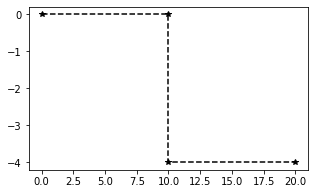

In [2]:
# Abscisses des 4 points de la ligne brisée
x = [0, 10, 10, 20]

# Ordonnées des 4 points de la ligne brisée
y = [0, 0, -4, -4]

# Affichage
plt.figure(figsize=(5,3))
plt.plot(x, y, color='k', linestyle='--', marker='*')
plt.show()

## Réalisation d'un filtre RIF

Le premier filtre appliqué sur l'ECG sera un filtre RIF synthétisé avec la méthode des fenêtres.

* Donnez, en le justifiant, les fenêtres pouvant être utilisés pour la synthèse du filtre numérique.

* Calculez la longueur des fenêtres qui conviennent.
  On choisit de ne travailler qu'avec la fenêtre permettant d'avoir l'ordre du filtre le plus faible.
  
* Synthétisez le filtre RIF avec `scipy.signal.firwin`.

* Vérifiez que le filtre obtenu correspond bien au gabarit numérique en traçant sa réponse en fréquence sur le gabarit
  (`scipy.signal.freqz`).
  
* En analysant le retard de groupe du filtre (`signal.group_delay`),
  indiquez quel est son effet sur le déphasage des fréquences.
  
* Affichez le diagramme pôle-zéro (`scipy.signal.tf2zpk`) : que pouvez-vous en conclure ?

* Appliquez ce filtre sur l'ECG (`scipy.signal.lfilter`) pour observer le résultat.

## Réalisation d'un filtre RII

On rappelle qu'avec la transformation bilinéaire, un filtre RII est conçu à partir d'un filtre analogique
obtenu à l'aide d'un gabarit analogique, lui-même construit à partir du gabarit numérique.

* Déterminez le gabarit du filtre analogique.

* Rappelez l'expression de la transformation bilinéaire permettant d'obtenir $H(z)$ à partir de $H(s)$.

* Synthétisez le filtre numérique avec la fonction `scipy.signal.iirdesign`.

* Vérifiez que le filtre obtenu correspond bien au gabarit numérique en traçant sa réponse fréquentielle sur le gabarit.

* De même que pour un filtre RIF, analysez le retard de groupe du filtre puis le diagramme pôle-zéro.

* Appliquez ce filtre sur l'ECG (`scipy.signal.lfilter`) pour observer le résultat.

## Comparaison des filtres synthétisés

* Discutez du résultat obtenu avec les deux méthodes de filtrage, à la fois en temporel et en fréquentiel.

* Comparez les deux filtres synthétisés, notamment sur :
  - leur performance vis-à-vis du gabarit souhaité,
  - leur phase et retard de groupe,
  - leur stabilité,
  - leur encombrement mémoire,
  - leur robustesse par rapport à la précision de leur coefficients,
  - etc.